In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from evalf import evalf
from visualize import visualize

%load_ext autoreload
%autoreload 2



def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

In [2]:
L_list = np.linspace(0,1e-1, 50)
tlist = np.linspace(0,1e-3,500)

S0 = 1 #initial supersaturation
V0 = 1
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e2, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,2:]

Text(0.5, 0, 't')

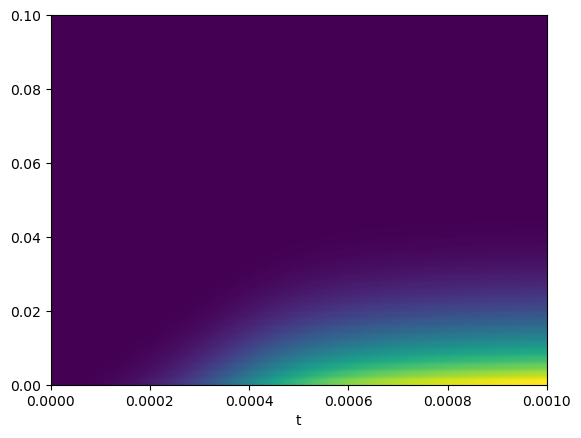

In [4]:
# plt.imshow(n_t.T, origin='lower')
better_imshow(L_list, tlist, n_t.T)
plt.xlabel('t')

In [5]:
# if there's nothing too concerning
if np.min(n_t) > -1e-8:
    # set slightly negative entries to 0
    n_t[n_t < 0] = 0

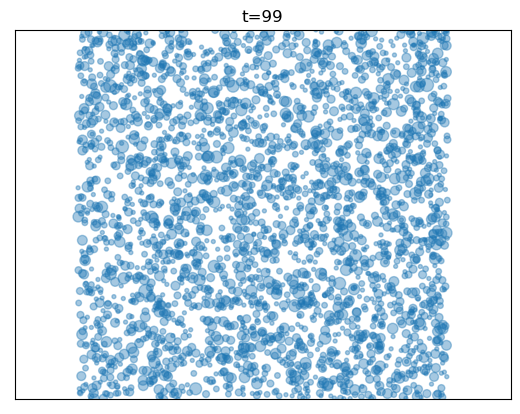

In [33]:
t_ind=99
visualize(n_t,L_list,t_ind, num_scale=100000, dot_scale=4000, alpha=0.4)
